# **Univariate Linear Regression on the California Housing Prices Dataset**

![California Housing Image](images/housing.webp)

The goal of this report is to train and evaluate univariate linear regression models on a dataset related to houses in California, based on the 1990 census data. Specifically, we aim to predict the median house value using three independent variables: median income, population, and the number of households.

### **Getting the data**

The dataset used in this analysis is sourced from the second chapter of Aurélien Géron's book 'Hands-On Machine Learning with Scikit-Learn and TensorFlow.' The data pertains to California districts and includes information such as longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, median house value, and ocean proximity.

[*Link to California Housing Prices Dataset*](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [8]:
# Import the pandas library
import pandas as pd

# Load data to dataframe
df = pd.read_csv("data/archive/housing.csv")

In [9]:
# Display few samples
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
# Data shape
print(df.shape)

(20640, 10)


In [12]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### **Exploratory Data Analysis (EDA)**

In [13]:
# Explore statistics for the following variables:
# Independent variables: median income, population & number of housholds
# Dependent variable: median house value
df[["median_house_value", "population", "households", "median_house_value"]].describe()

,median_house_value,population,households,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,1425.476744,499.539680,206855.816909
std,115395.615874,1132.462122,382.329753,115395.615874
min,14999.000000,3.000000,1.000000,14999.000000
25%,119600.000000,787.000000,280.000000,119600.000000
50%,179700.000000,1166.000000,409.000000,179700.000000
75%,264725.000000,1725.000000,605.000000,264725.000000
max,500001.000000,35682.000000,6082.000000,500001.000000


Describe

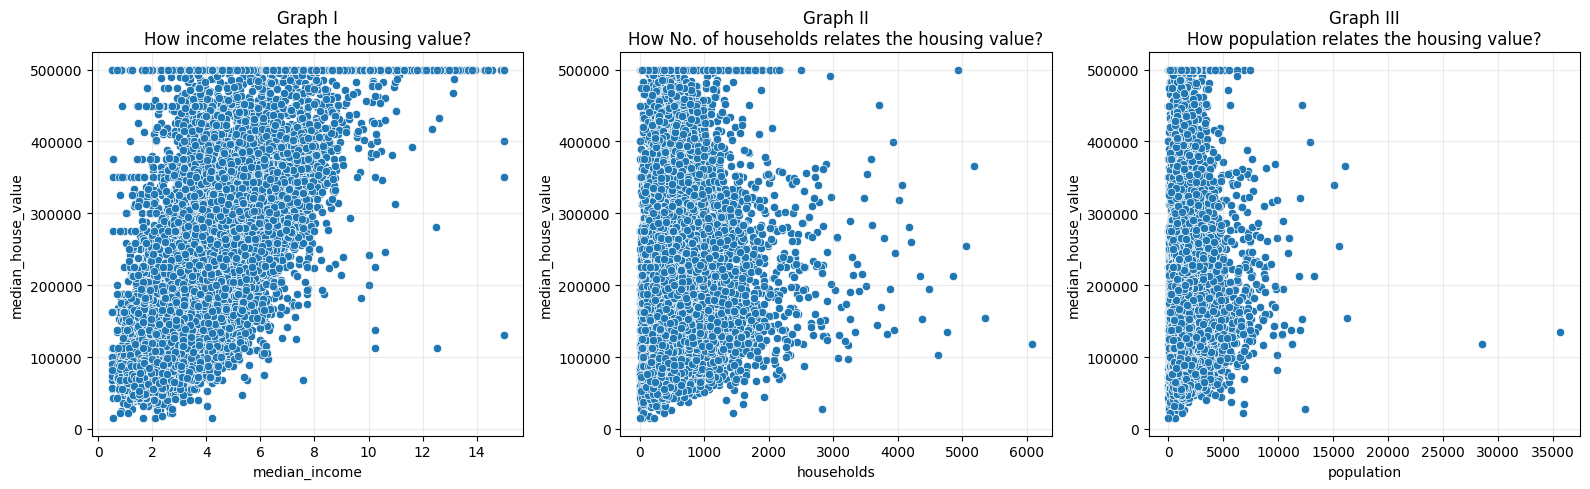

In [23]:
# Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))

# Median income VS Median house value
plt.subplot(1,3,1)
sns.scatterplot(df, x="median_income", y="median_house_value")
plt.title("Graph I\nHow income relates the housing value?")
plt.grid(alpha=0.25)

# Number of households VS Median house value
plt.subplot(1,3,2)
sns.scatterplot(df, x="households", y="median_house_value")
plt.title("Graph II\nHow No. of households relates the housing value?")
plt.grid(alpha=0.25)

# Population VS Median house value
plt.subplot(1,3,3)
sns.scatterplot(df, x="population", y="median_house_value")
plt.title("Graph III\nHow population relates the housing value?")
plt.grid(alpha=0.25)

plt.tight_layout()
plt.show()

### **Modeling: Linear Regression**

In [35]:
# Import necessary libraries for modeling
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Variable to store regression results
model_results = {
    "fit": [],
    "intercept" : [],
    "slope" : [],
    "mae" : [],
    "mse" : []
}

#### Median House Value VS. Median Income

In [36]:
# Model1
model1 = LinearRegression()
model1.fit(X=df[["median_income"]], y=df[["median_house_value"]])

# Model 1 Evaluate
mae = mean_absolute_error(df['median_house_value'], model1.predict(X=df[["median_income"]]))
mse = mean_squared_error(df['median_house_value'], model1.predict(X=df[["median_income"]]))

# Display results
print(f"Intercept: {model1.intercept_}")
print(f"Intercept: {model1.coef_}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

# Store results for summarizing
model_results["fit"].append("Median Income vs. Median House Value")
model_results["intercept"].append(model1.intercept_)
model_results["slope"].append(model1.coef_)
model_results["mae"].append(mae)
model_results["mse"].append(mse)

Intercept: [45085.57670327]
Intercept: [[41793.8492019]]
MAE: 62625.9337911434
MSE: 7011311502.929527


#### Median House Value VS. Households

In [37]:
# Model2
model2 = LinearRegression()
model2.fit(X=df[["households"]], y=df[["median_house_value"]])

# Model 2 Evaluate
mae = mean_absolute_error(df['median_house_value'], model2.predict(X=df[["households"]]))
mse = mean_squared_error(df['median_house_value'], model2.predict(X=df[["households"]]))

# Display results
print(f"Intercept: {model2.intercept_}")
print(f"Intercept: {model2.coef_}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

# Store results for summarizing
model_results["fit"].append("Households vs. Median House Value")
model_results["intercept"].append(model2.intercept_)
model_results["slope"].append(model2.coef_)
model_results["mae"].append(mae)
model_results["mse"].append(mse)

Intercept: [196928.57716233]
Intercept: [[19.87277516]]
MAE: 90802.74324318448
MSE: 13257776904.728533


#### Median House Value VS. Population

In [38]:
# Model3
model3 = LinearRegression()
model3.fit(X=df[["population"]], y=df[["median_house_value"]])

# Model 3 Evaluate
mae = mean_absolute_error(df['median_house_value'], model3.predict(X=df[["population"]]))
mse = mean_squared_error(df['median_house_value'], model3.predict(X=df[["population"]]))

# Display results
print(f"Intercept: {model3.intercept_}")
print(f"Intercept: {model3.coef_}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

# Store results for summarizing
model_results["fit"].append("Population vs. Median House Value")
model_results["intercept"].append(model3.intercept_)
model_results["slope"].append(model3.coef_)
model_results["mae"].append(mae)
model_results["mse"].append(mse)

Intercept: [210436.26207627]
Intercept: [[-2.51175277]]
MAE: 91153.82009473183
MSE: 13307412412.389355


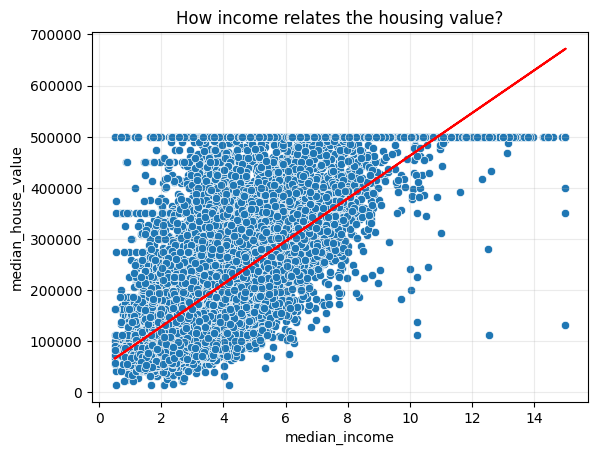

In [87]:
sns.scatterplot(df, x="median_income", y="median_house_value")
plt.plot(df["median_income"],model.predict(X=df[["median_income"]]), color="red")
plt.title("How income relates the housing value?")
plt.grid(alpha=0.25)
plt.show()

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [84]:
mae = mean_absolute_error(df['median_house_value'], model.predict(X=df[["median_income"]]))
print(f"MAE: {mae}")
mse = mean_squared_error(df['median_house_value'], model.predict(X=df[["median_income"]]))
print(f"MSE: {mse}")

MAE: 62625.9337911434
MSE: 7011311502.929527
